In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Lucida"]})
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("csvs/normal+_eval_preds.csv").drop(columns=["index"])
for c in ["DISEASE1_pred", "DISEASE2_pred", "DISEASE3_pred"]:
    df[c] = np.round(df[c], decimals=0)
df = df[['PLOT_FILE', 'DISEASE1', 'DISEASE1_pred', 'DISEASE2', 'DISEASE2_pred', 'DISEASE3', 'DISEASE3_pred']]

In [3]:
df

,PLOT_FILE,DISEASE1,DISEASE1_pred,DISEASE2,DISEASE2_pred,DISEASE3,DISEASE3_pred
0,plots/Micasense_Rededge-Dual_ms_reflectance/20...,0.0,0.0,0.0,0.0,6.0,8.0
1,plots/Micasense_Rededge-Dual_ms_reflectance/20...,0.0,1.0,0.0,0.0,22.0,15.0
2,plots/Micasense_Rededge-Dual_ms_reflectance/20...,0.0,0.0,0.0,0.0,5.0,3.0
3,plots/Micasense_Rededge-M_ms_reflectance/2020-...,3.0,1.0,0.0,0.0,0.0,2.0
4,plots/Micasense_Rededge-M_ms_reflectance/2020-...,1.0,2.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...
1359,plots/Micasense_Rededge-Dual_ms_reflectance/20...,0.0,0.0,95.0,93.0,0.0,0.0
1360,plots/Micasense_Rededge-M_ms_reflectance/2020-...,0.0,0.0,0.0,1.0,8.0,11.0
1361,plots/Micasense_Rededge-M_ms_reflectance/2020-...,0.0,0.0,30.0,27.0,0.0,0.0
1362,plots/Micasense_Rededge-M_ms_reflectance/2020-...,0.0,0.0,65.0,51.0,0.0,0.0


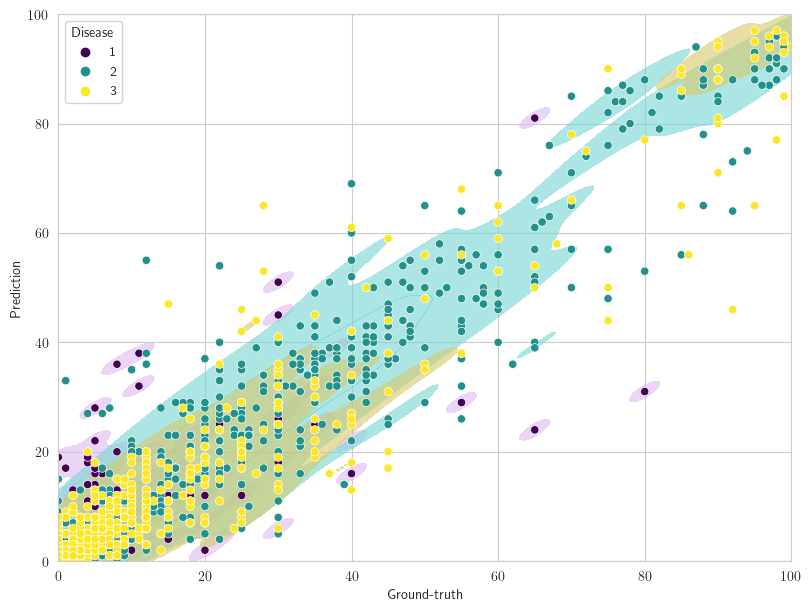

In [4]:
l = len(df)
disease = list()
pred = list()
number = list()
for i in range(1,3+1):
    disease.extend(df["DISEASE%s"%i])
    pred.extend(df["DISEASE%s_pred"%i])
    number.extend([i for _ in range(l)])
df_sep = pd.DataFrame({"Ground-truth":disease,"Prediction":pred,"Disease":number})
#df_sep["Ground-truth"],df_sep["Prediction"],df_sep["Number"] = [disease,pred,number]

plt.figure(figsize=[8,6], layout="constrained")
g = sns.kdeplot(df_sep,x = "Ground-truth",y="Prediction",hue = "Disease",fill = True,alpha = 0.6,clip = (0,100),palette="viridis")
f = sns.scatterplot(df_sep,x = "Ground-truth",y="Prediction",hue = "Disease", palette="viridis")
sns.move_legend(g,loc="upper left")
plt.savefig("figs/kernel.png")

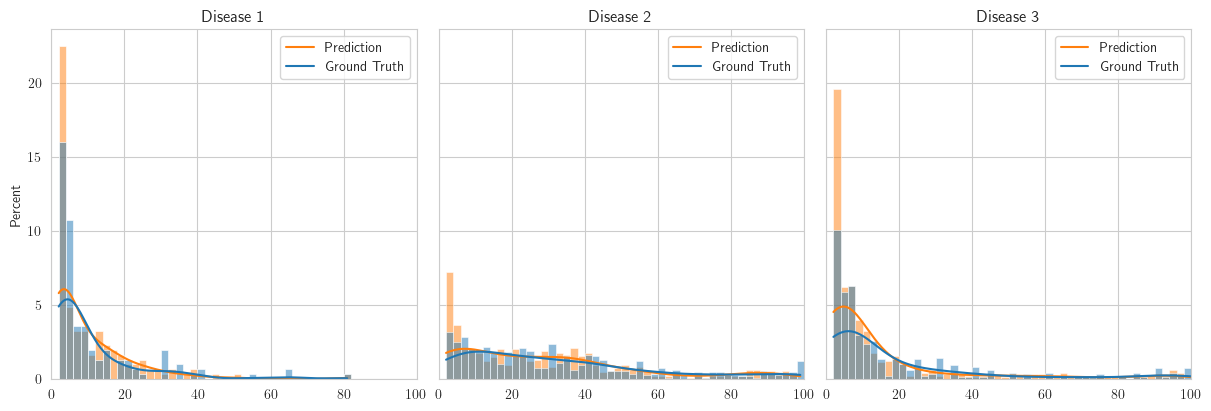

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[12,4], sharey=True, layout="constrained")
ax: list[plt.Axes]

for i in range(3):
    sns.histplot(df[[f'DISEASE{i+1}', f'DISEASE{i+1}_pred']].replace([0,1], np.NaN), binwidth=2, kde=True, ax=ax[i],stat="percent")
    ax[i].set_title(f"Disease {i+1}")
    ax[i].legend(["Prediction", "Ground Truth"])
    ax[i].set_xlim(0, 100)

plt.savefig("figs/distributions.png")

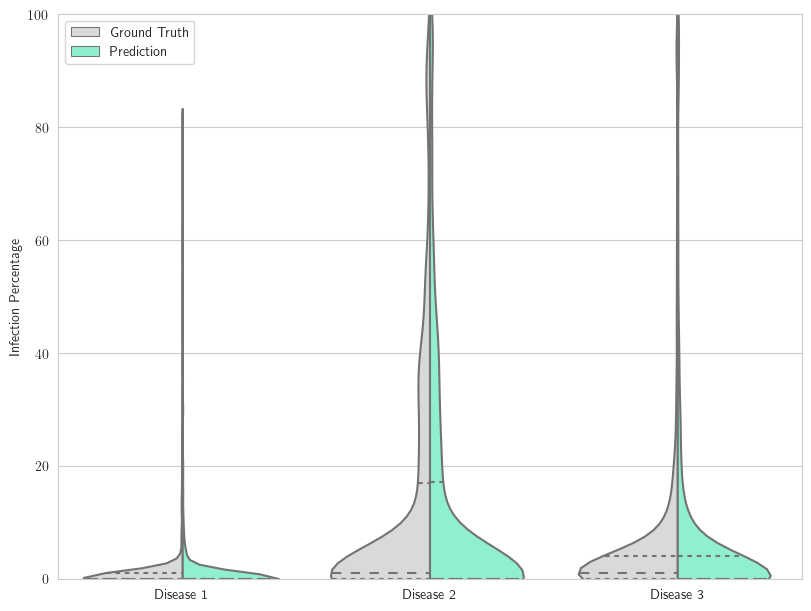

In [10]:
df_npred = df[["DISEASE1", "DISEASE2", "DISEASE3"]].copy()
df_npred = df_npred.stack().reset_index()
df_npred = df_npred.rename(columns={"level_1": "disease", 0: "Infection Percentage"}).drop(columns="level_0")
df_npred["pred"] = "Prediction"

df_pred = df[["DISEASE1_pred", "DISEASE2_pred", "DISEASE3_pred"]].copy()
df_pred.columns = [c.split("_")[0] for c in df_pred.columns] 
df_pred = df_pred.stack().reset_index()
df_pred = df_pred.rename(columns={"level_1": "disease", 0: "Infection Percentage"}).drop(columns="level_0")
df_pred["pred"] = "Ground Truth"

dfw = pd.concat([df_pred, df_npred], axis=0)
dfw["disease"] = dfw["disease"].str.replace("DISEASE", "Disease ")

plt.figure(figsize=[8,6], layout="constrained")
sns.violinplot(data=dfw, x="disease", y="Infection Percentage", hue="pred",
               split=True, inner="quart",
               palette={"Prediction": "aquamarine", "Ground Truth": ".85"})
plt.legend(loc="upper left")
plt.ylim(0,100)
plt.xlabel("");
plt.savefig("figs/violin.png")